In [115]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle
import os
import warnings
import matplotlib.pyplot as plt
input_dir = os.path.join(os.path.dirname(os.getcwd()), 'data','raw')
print(input_dir)
input_dirr=os.path.join(input_dir,"SouthGermanCredit.csv")
input_dirr

C:\Python_Lab\ineuron\internship\Predict Bank Credit Risk using South German Credit Data\Credit_Risk\data\raw


'C:\\Python_Lab\\ineuron\\internship\\Predict Bank Credit Risk using South German Credit Data\\Credit_Risk\\data\\raw\\SouthGermanCredit.csv'

In [116]:
os.getcwd()

'C:\\Python_Lab\\ineuron\\internship\\Predict Bank Credit Risk using South German Credit Data\\Credit_Risk\\notebooks'

In [117]:
df = pd.read_csv(input_dirr)
df.head()

status  duration  credit_history  purpose  amount  savings  \
0       1        18               4        2    1049        1   
1       1         9               4        0    2799        1   
2       2        12               2        9     841        2   
3       1        12               4        0    2122        1   
4       1        12               4        0    2171        1   

   employment_duration  installment_rate  personal_status_sex  other_debtors  \
0                    2                 4                    2              1   
1                    3                 2                    3              1   
2                    4                 2                    2              1   
3                    3                 3                    3              1   
4                    3                 4                    3              1   

   ...  property  age  other_installment_plans  housing  number_credits  job  \
0  ...         2   21                        3        1               1    3   
1  ...         1   36                        3        1               2    3   
2  ...         1   23                        3        1               1    2   
3  ...         1   39                        3        1               2    2   
4  ...         2   38                        1        2               2    2   

   people_liable  telephone  foreign_worker  credit_risk  
0              2          1               2            1  
1              1          1               2            1  
2              2          1               2            1  
3              1          1               1            1  
4              2          1               1            1  

[5 rows x 21 columns]

In [118]:
print('Shape before deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (1000, 21)


In [119]:
# Removing duplicate rows if any
df=df.drop_duplicates()
print('Shape After removing duplicate values:', df.shape)

Shape After removing duplicate values: (1000, 21)


<AxesSubplot:xlabel='credit_risk'>

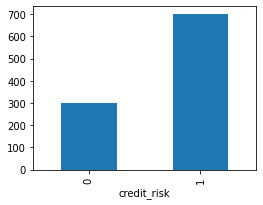

In [120]:
%matplotlib inline
# Creating Bar chart of credit_risk(Target) as it's a Categorical variable
target_col=df.groupby('credit_risk').size()
target_col.plot(kind='bar', figsize=(4,3))

In [121]:
# Finding how many missing values are there for each column
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [122]:
#df['status'] = df['status'].apply(lambda col:pd.Categorical(col).codes)


df.status = pd.Categorical(df.status)
df.credit_history = pd.Categorical(df.credit_history)

df.purpose = pd.Categorical(df.purpose)
df.savings = pd.Categorical(df.savings)
df.personal_status_sex = pd.Categorical(df.personal_status_sex)
df.other_debtors = pd.Categorical(df.other_debtors)
df.other_installment_plans = pd.Categorical(df.other_installment_plans)
df.housing = pd.Categorical(df.housing)
df.job = pd.Categorical(df.job)
df.people_liable = pd.Categorical(df.people_liable)
df.telephone = pd.Categorical(df.telephone)
df.foreign_worker = pd.Categorical(df.foreign_worker)
df.credit_risk = pd.Categorical(df.credit_risk)
df.employment_duration = pd.Categorical(df.employment_duration)
df.installment_rate = pd.Categorical(df.installment_rate)
df.present_residence = pd.Categorical(df.present_residence)
df.property = pd.Categorical(df.property)
df.number_credits = pd.Categorical(df.number_credits)
# for col in df.dtypes:
#     print(f'{col}: float'

In [123]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)


In [124]:
#exclude dependent variable

target_variable = df.iloc[:,-1]


In [125]:
target_variable=target_variable.name
target_variable

'credit_risk'

In [126]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=df.select_dtypes(include='int64').columns
select_cont_column=FunctionAnova(inpData=df, TargetVariable=target_variable, ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

duration is correlated with credit_risk | P-Value: 6.488049877187189e-12
amount is correlated with credit_risk | P-Value: 8.795399017206301e-07
age is correlated with credit_risk | P-Value: 0.003868455281308189


In [127]:
select_cont_column

['duration', 'amount', 'age']

In [128]:
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [129]:
a=df.select_dtypes(include='category').columns
print(a)
print(target_variable)


Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')
credit_risk


In [130]:
"""
target_variable=target_variable.tolist()
a=a.tolist()
print(a)
print(df)
print(target_variable)
"""

'\ntarget_variable=target_variable.tolist()\na=a.tolist()\nprint(a)\nprint(df)\nprint(target_variable)\n'

In [131]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [132]:
# Calling the function
selectedPrdictor=FunctionChisq(inpData=df, 
              TargetVariable=target_variable,
              CategoricalVariablesList= a)

status is correlated with credit_risk | P-Value: 1.2189020722893755e-26
credit_history is correlated with credit_risk | P-Value: 1.2791872956750918e-12
purpose is correlated with credit_risk | P-Value: 0.00011574910079691586
savings is correlated with credit_risk | P-Value: 2.761214238568249e-07
employment_duration is correlated with credit_risk | P-Value: 0.0010454523491402541
installment_rate is NOT correlated with credit_risk | P-Value: 0.1400333122128481
personal_status_sex is correlated with credit_risk | P-Value: 0.02223800546926877
other_debtors is correlated with credit_risk | P-Value: 0.036055954027247206
present_residence is NOT correlated with credit_risk | P-Value: 0.8615521320413175
property is correlated with credit_risk | P-Value: 2.8584415733250017e-05
other_installment_plans is correlated with credit_risk | P-Value: 0.0016293178186473534
housing is correlated with credit_risk | P-Value: 8.810311250241031e-05
number_credits is NOT correlated with credit_risk | P-Value: 

In [133]:
selectedPrdictor

['status',
 'credit_history',
 'purpose',
 'savings',
 'employment_duration',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'foreign_worker',
 'credit_risk']

In [134]:
select_cont_column

['duration', 'amount', 'age']

In [135]:
# Selecting final columns
joinedlist = selectedPrdictor + select_cont_column
Data_for_model=df[joinedlist]
Data_for_model=Data_for_model.loc[:, Data_for_model.columns!='credit_risk']
Data_for_model.shape

(1000, 14)

In [136]:
# Saving this final data for reference during deployment
Data_for_model.to_pickle('Data_for_model.pkl')

In [137]:
df['credit_risk']

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: credit_risk, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [138]:
# Treating all the nominal variables at once using dummy variables
nominaldata1=['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing','foreign_worker']
print(len(nominaldata1))
#nominaldata=Data_for_model[nominaldata1]
#Data_for_model_Numeric=pd.get_dummies(nominaldata)

ohenc = OneHotEncoder(sparse=False, dtype=int).fit(Data_for_model[nominaldata1])
with open('ohenc.pkl', 'wb') as pkl_file:
    pickle.dump(ohenc, pkl_file) # Exporting Final Trained Model

encoded_data = ohenc.transform(Data_for_model[nominaldata1])
encoded_df = pd.DataFrame(encoded_data, columns = [ f'OHE{i}' for i in range(1, encoded_data.shape[1] + 1)])
Data_for_model_Numeric = Data_for_model.reset_index(drop=True).drop(nominaldata1, axis=1).merge(encoded_df, 
                                                                                        how='left', 
                                                                                        left_index=True, 
                                                                                        right_index=True)

# Adding Target Variable to the data

Data_for_model_Numeric['credit_risk']=df['credit_risk']
Data_for_model_Numeric[['duration', 'amount', 'age','property','employment_duration']]=Data_for_model[['duration', 'amount', 'age','property','employment_duration']]
Data_for_model_Numeric.head()

9


employment_duration property  duration  amount  age  OHE1  OHE2  OHE3  OHE4  \
0                   2        2        18    1049   21     1     0     0     0   
1                   3        1         9    2799   36     1     0     0     0   
2                   4        1        12     841   23     0     1     0     0   
3                   3        1        12    2122   39     1     0     0     0   
4                   3        2        12    2171   38     1     0     0     0   

   OHE5  ...  OHE31  OHE32  OHE33  OHE34  OHE35  OHE36  OHE37  OHE38  OHE39  \
0     0  ...      0      0      0      1      1      0      0      0      1   
1     0  ...      0      0      0      1      1      0      0      0      1   
2     0  ...      0      0      0      1      1      0      0      0      1   
3     0  ...      0      0      0      1      1      0      0      1      0   
4     0  ...      0      1      0      0      0      1      0      1      0   

   credit_risk  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 45 columns]

In [139]:
Data_for_model_Numeric.columns

Index(['employment_duration', 'property', 'duration', 'amount', 'age', 'OHE1',
       'OHE2', 'OHE3', 'OHE4', 'OHE5', 'OHE6', 'OHE7', 'OHE8', 'OHE9', 'OHE10',
       'OHE11', 'OHE12', 'OHE13', 'OHE14', 'OHE15', 'OHE16', 'OHE17', 'OHE18',
       'OHE19', 'OHE20', 'OHE21', 'OHE22', 'OHE23', 'OHE24', 'OHE25', 'OHE26',
       'OHE27', 'OHE28', 'OHE29', 'OHE30', 'OHE31', 'OHE32', 'OHE33', 'OHE34',
       'OHE35', 'OHE36', 'OHE37', 'OHE38', 'OHE39', 'credit_risk'],
      dtype='object')

In [140]:
# Printing all the column names 
Data_for_model_Numeric1=Data_for_model_Numeric.loc[:, Data_for_model_Numeric.columns!='credit_risk']
Data_for_model_Numeric1.columns

Index(['employment_duration', 'property', 'duration', 'amount', 'age', 'OHE1',
       'OHE2', 'OHE3', 'OHE4', 'OHE5', 'OHE6', 'OHE7', 'OHE8', 'OHE9', 'OHE10',
       'OHE11', 'OHE12', 'OHE13', 'OHE14', 'OHE15', 'OHE16', 'OHE17', 'OHE18',
       'OHE19', 'OHE20', 'OHE21', 'OHE22', 'OHE23', 'OHE24', 'OHE25', 'OHE26',
       'OHE27', 'OHE28', 'OHE29', 'OHE30', 'OHE31', 'OHE32', 'OHE33', 'OHE34',
       'OHE35', 'OHE36', 'OHE37', 'OHE38', 'OHE39'],
      dtype='object')

In [141]:
TargetVariable=target_variable
TargetVariable
Predictors=Data_for_model_Numeric1.columns
Predictors
X=Data_for_model_Numeric[Predictors].values

y=Data_for_model_Numeric[TargetVariable].values


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [142]:
X[0]

array([   2,    2,   18, 1049,   21,    1,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    1,    0,    0,
          1,    0,    0,    0,    0,    1,    1,    0,    0,    0,    1],
      dtype=int64)

In [143]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)
with open('MinMaxScaler.pkl', 'wb') as pkl_file:
    pickle.dump(PredictorScalerFit, pkl_file)
    
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 44)
(700,)
(300, 44)
(300,)


In [145]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [146]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [147]:
rf_Model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4,refit = True)


In [148]:
rf_Grid.fit(X_train, y_train)
with open('rf_Grid.pkl', 'wb') as pkl_file:
    pickle.dump(rf_Grid, pkl_file)
    
prediction_train=rf_Grid.predict(X_train)
prediction_test=rf_Grid.predict(X_test)
rf_Grid.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 30}

In [149]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print(metrics.confusion_matrix(y_train,prediction_train))
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')
print(metrics.confusion_matrix(y_test,prediction_test))

Train Accuracy - : 0.750
[[ 35 173]
 [  2 490]]
Test Accuracy - : 0.710
[[  9  83]
 [  4 204]]


In [150]:
def predict_diff_thresh(pred_probs, thresh):
    return np.where(pred_probs > thresh, 1, 0)

## Code for Getting Different threshold

fpr, tpr, thresholds = roc_curve(y_test, rf_Grid.predict_proba(X_test)[:, 1])
# print(thresholds)

accuracy_ls = []
for thres in thresholds:
    data_dict = dict()
    data_dict['threshold'] = thres
    y_pred = np.where(prediction_test > thres,1,0)
    data_dict['f1_score'] = f1_score(y_test, y_pred)
    accuracy_ls.append(data_dict)
    
accuracy_ls = pd.DataFrame(accuracy_ls)
accuracy_ls = accuracy_ls.sort_values('f1_score', ascending=False).reset_index(drop=True)
accuracy_ls.head()

threshold  f1_score
0   0.645379  0.824242
1   0.583660  0.824242
2   0.590937  0.824242
3   0.592786  0.824242
4   0.593506  0.824242

In [157]:
import json
json.dumps(Data_for_model.loc[0].to_dict())

'{"status": 1, "credit_history": 4, "purpose": 2, "savings": 1, "employment_duration": 2, "personal_status_sex": 2, "other_debtors": 1, "property": 2, "other_installment_plans": 3, "housing": 1, "foreign_worker": 2, "duration": 18, "amount": 1049, "age": 21}'

In [151]:
prediction_train_thres=rf_Grid.predict_proba(X_train)
prediction_test_thres=rf_Grid.predict_proba(X_test)

In [152]:
prediction_train_thres1=predict_diff_thresh(prediction_train_thres[:, 1],accuracy_ls['threshold'][0])
prediction_test_thres1=predict_diff_thresh(prediction_test_thres[:, 1],accuracy_ls['threshold'][0])

In [153]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print(metrics.confusion_matrix(y_train,prediction_train_thres1))
print(metrics.classification_report(y_train, prediction_train_thres1))
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')
print(metrics.confusion_matrix(y_test,prediction_test_thres1))
print(metrics.classification_report(y_test, prediction_test_thres1))

Train Accuracy - : 0.750
[[155  53]
 [ 88 404]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       208
           1       0.88      0.82      0.85       492

    accuracy                           0.80       700
   macro avg       0.76      0.78      0.77       700
weighted avg       0.81      0.80      0.80       700

Test Accuracy - : 0.710
[[ 63  29]
 [ 50 158]]
              precision    recall  f1-score   support

           0       0.56      0.68      0.61        92
           1       0.84      0.76      0.80       208

    accuracy                           0.74       300
   macro avg       0.70      0.72      0.71       300
weighted avg       0.76      0.74      0.74       300



-----------below train confusion matrix -------
              precision    recall  f1-score   support

           0       0.97      0.36      0.52       208
           1       0.79      1.00      0.88       492

    accuracy                           0.81       700
   macro avg       0.88      0.68      0.70       700
weighted avg       0.84      0.81      0.77       700

[[ 74 134]
 [  2 490]]
-----------below test confusion matrix -------
              precision    recall  f1-score   support

           0       0.64      0.15      0.25        92
           1       0.72      0.96      0.82       208

    accuracy                           0.71       300
   macro avg       0.68      0.56      0.53       300
weighted avg       0.69      0.71      0.65       300

[[ 14  78]
 [  8 200]]
Accuracy of the model on training Sample Data: 0.77
Accuracy of the model on Testing Sample Data: 0.65

Accuracy values for 10-fold Cross Validation:
 [0.62083333 0.66513016 0.64715447 0.69899666 0.6087880

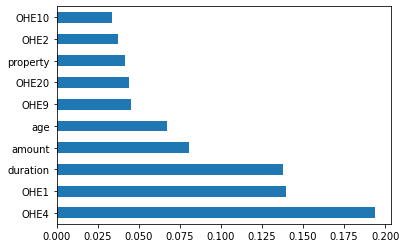

In [154]:

# creating a list of different leaf sizes
sample_leaf_options = [1,2,3,4,5,10,20,25]

# for loop to iterate for each leaf size
for leaf_size in sample_leaf_options :
    clf = RandomForestClassifier(max_depth=5,n_estimators = 100, n_jobs = -1,random_state =50, min_samples_leaf = leaf_size)
    

    RF=clf.fit(X_train,y_train)
    prediction_train=RF.predict(X_train)

    RF=clf.fit(X_train,y_train)
    prediction_test=RF.predict(X_test)

    # Measuring accuracy on Testing Data
    
    print("-----------below train confusion matrix -------")
    print(metrics.classification_report(y_train, prediction_train))
    print(metrics.confusion_matrix(y_train, prediction_train))
    print("-----------below test confusion matrix -------")
    print(metrics.classification_report(y_test, prediction_test))
    print(metrics.confusion_matrix(y_test, prediction_test))

    F1_Score_train=metrics.f1_score(y_train, prediction_train, average='weighted')
    F1_Score_test=metrics.f1_score(y_test, prediction_test, average='weighted')
    print('Accuracy of the model on training Sample Data:', round(F1_Score_train,2))
    print('Accuracy of the model on Testing Sample Data:', round(F1_Score_test,2))

    from sklearn.model_selection import cross_val_score

    Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
    print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
    print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


    %matplotlib inline
    feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
    feature_importances.nlargest(10).plot(kind='barh')

In [155]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, n_estimators=70,n_jobs = -1,criterion='gini')

RF=clf.fit(X_train,y_train)
prediction_train=RF.predict(X_train)

RF=clf.fit(X_train,y_train)
prediction_test=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score_train=metrics.f1_score(y_train, prediction_train, average='weighted')
F1_Score_test=metrics.f1_score(y_test, prediction_test, average='weighted')
print('Accuracy of the model on training Sample Data:', round(F1_Score_train,2))
print('Accuracy of the model on Testing Sample Data:', round(F1_Score_test,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

NameError: name 'prediction' is not defined

In [ ]:
#{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50} 0.6274899129064917

# Decision Trees


In [ ]:

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

print(clf)


DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))


F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# K-Nearest Neighbor(KNN)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

print(clf)

KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



# Support Vector Machines(SVM)

In [ ]:

from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)


SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))


F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


%matplotlib inline
#feature_importances = pd.Series(SVM.coef_, index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Naive Bayes

In [ ]:

from sklearn.naive_bayes import GaussianNB, MultinomialNB

clf = GaussianNB()

print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# logistic Regression


In [ ]:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))